In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_context('talk')

from matplotlib.ticker import FuncFormatter

In [2]:
labelsize = 15

In [3]:
def scientific_tex_formatter(x, pos):
    if x == 0.:
        return r'$0$'
    
    str_ = "%.1e" % x
    
    #str_ = str_.replace('1.0', '')
    str_ = str_.replace('e-', '\,\,10^{-')
    str_ = str_.replace('e+', '\,\,10^{')
    
    if str_[-2] == '0':
        str_ = str_[:-2] + str_[(-1):]
    
    str_ = str_ + '}'
    str_ = r'$%s$' % str_
    
    return str_

f_scientific_tex_formatter = FuncFormatter(scientific_tex_formatter)

def scientific_tex_formatter2(x, pos):
    if x == 1.:
        return r'$1$'
    
    str_ = "%.1e" % x
    
    str_ = str_.replace('1.0', '')
    str_ = str_.replace('e-0', '\,\,10^{-')
    str_ = str_.replace('e+0', '\,\,10^{')
    
    str_ = str_ + '}'
    str_ = r'$%s$' % str_
    
    return str_

f_scientific_tex_formatter2 = FuncFormatter(scientific_tex_formatter2)

In [4]:
def tex_foramtter(x, pos):
    return r'$\rm{%s}$' % x

f_tex_foramtter = FuncFormatter(tex_foramtter)

def tex_transf(x):
    return r'$\rm{%s}$' % x

In [5]:
def tex_pct_formatter(x, pos):
    return r'$%.0f \%%$' % x

f_tex_pct_formatter = FuncFormatter(tex_pct_formatter)

In [6]:
import pandas as pd
import numpy as np

import os

# Traded volumes

In [7]:
dir_tr_input_ = './transformed_input'

members_pos = pd.read_csv(os.path.join(dir_tr_input_, 'positions.csv'), header=0, index_col=0)

members_pos.head()


,AAI,AEX,AF,AGN,AH,AHA,AI,AKZ,AL1,ASL,...,UCB,UG,UL,UMC,UN,VIE,VK,VPK,WHV,WKL
PB1,0.00,0.000,0.00,0.00,0.0,0.0,0.0000,0.00,0.0,0.0000,...,0.00,0.00,0.00,0.00,0.00,0.00,0.0000,0.00,0.00,0.0
PB2,0.00,600.000,0.00,0.00,0.0,0.0,0.0000,0.00,0.0,0.0000,...,0.00,0.00,0.00,0.00,0.00,0.00,0.0000,0.00,0.00,0.0
PB3,0.00,-1200.000,0.00,0.00,0.0,0.0,0.0000,0.00,0.0,0.0000,...,0.00,0.00,0.00,0.00,0.00,0.00,0.0000,0.00,0.00,0.0
PB4,0.00,116200.000,0.00,0.00,0.0,0.0,-200.2320,0.00,0.0,0.0000,...,0.00,0.00,0.00,0.00,0.00,0.00,0.0000,0.00,0.00,0.0
PB5,2913.25,200149.546,62689.56,1251773.09,220357.6,0.0,521.7448,34769.11,0.0,51224.8981,...,4651.92,8907.06,2564.61,-8852.76,157406.06,-174.95,23508.6628,3601.46,50772.03,-175655.6


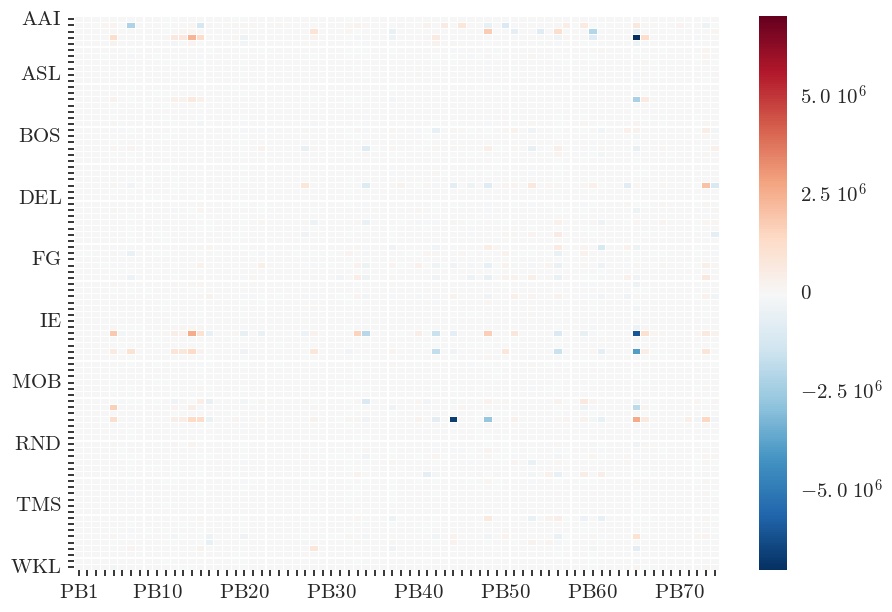

In [8]:
def label_chooser(index):
    if index == 0:
        return True
    
    if (i + 1) % 10 == 0:
        return True
    
    return False

f, ax = plt.subplots()

sns.heatmap(members_pos.T, ax=ax, linewidths=.1, 
            cbar_kws={'format': f_scientific_tex_formatter})

cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=labelsize)

x_labels = [tex_transf(lab) if label_chooser(i) else '' for i, lab in enumerate(members_pos.index.tolist())]

ax.set_xticklabels(x_labels)
ax.xaxis.set_tick_params(length=4)
ax.xaxis.set_ticks_position('bottom')
for label in ax.get_xticklabels():
    label.set_rotation(0)

y_labels = [tex_transf(lab) if label_chooser(i) else '' for i, lab in enumerate(members_pos.columns)]
    
ax.yaxis.set_tick_params(length=4)
ax.set_yticklabels(y_labels[::-1])

plt.tick_params(axis='both', which='major', labelsize=labelsize)

plt.show()

# Underlyings values

In [9]:
udls = pd.read_csv(os.path.join(dir_tr_input_,'UDL.csv'), header=0, index_col=0)
udl_values = udls['UDL value']

In [10]:
abs_positions = members_pos.abs()

gross_positions_aggreg = abs_positions.sum(axis=0)
gross_positions_udl = gross_positions_aggreg.multiply(udl_values)

In [11]:
udls_values_crtierion = pd.DataFrame()
udls_values_crtierion[r'$\rm{Underlying \,\, asset \,\, values}$'] = udl_values
udls_values_crtierion['criterion'] = gross_positions_udl

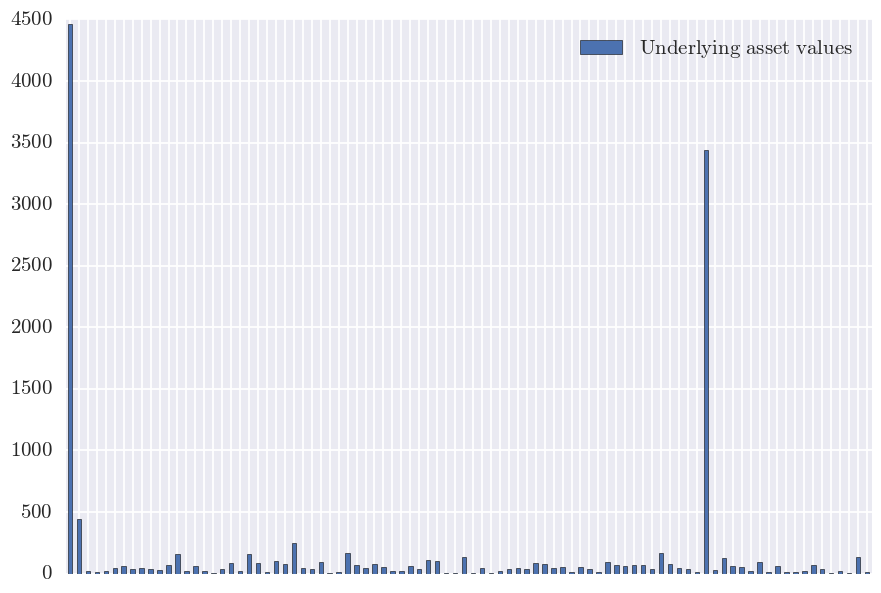

In [12]:
f, ax = plt.subplots()

udls_values_crtierion.sort_values('criterion')[::-1][r'$\rm{Underlying \,\, asset \,\, values}$'].plot.bar(ax=ax)

labels = ['' for item in ax.get_xticklabels()]
ax.set_xticklabels(labels)
ax.xaxis.label.set_visible(False)

#ax.yaxis.set_major_formatter(f_scientific_tex_formatter)

def integ_tex_formatter(x, pos):
    return tex_transf("%.0f" % x)

ax.yaxis.set_major_formatter(FuncFormatter(integ_tex_formatter))

plt.tick_params(axis='both', which='major', labelsize=labelsize)
plt.legend(fontsize=labelsize)

plt.show()

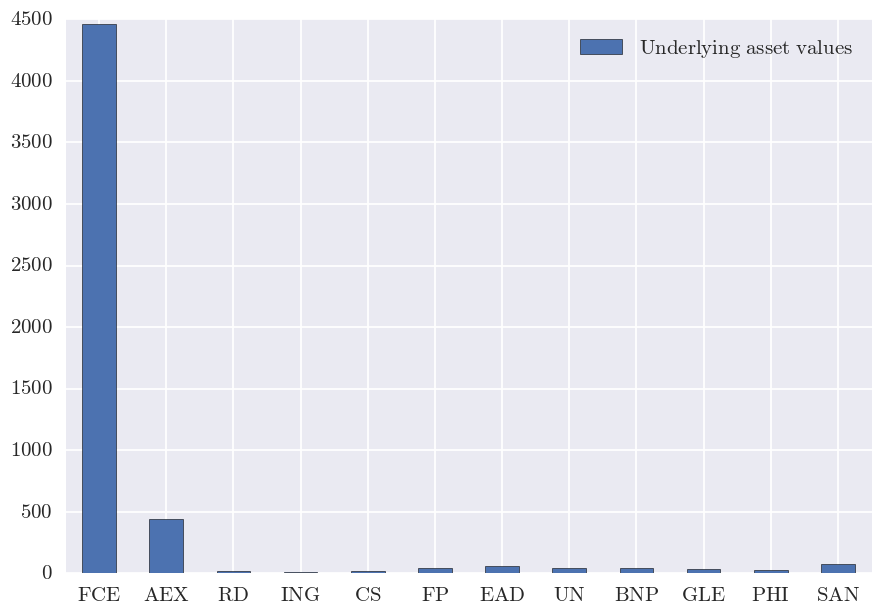

In [13]:
f, ax = plt.subplots()

udls_values_crtierion.sort_values('criterion')[::-1][r'$\rm{Underlying \,\, asset \,\, values}$'][:12].plot.bar(ax=ax)

labels = [tex_transf(item.get_text()) for item in ax.get_xticklabels()]
ax.set_xticklabels(labels)
ax.xaxis.label.set_visible(False)

for label in ax.get_xticklabels():
    label.set_rotation(0) 

#ax.yaxis.set_major_formatter(f_scientific_tex_formatter)
ax.yaxis.set_major_formatter(FuncFormatter(integ_tex_formatter))

plt.tick_params(axis='both', which='major', labelsize=labelsize)
plt.legend(fontsize=labelsize)

plt.show()